<a href="https://www.kaggle.com/code/narendranandagiri/bank-term-predection?scriptVersionId=156979619" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("/kaggle/input/bank-term-deposit-predictions/test.csv")
dft=pd.read_csv("/kaggle/input/bank-term-deposit-predictions/train.csv")

In [3]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [4]:
df.shape

(4521, 17)

In [5]:
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [6]:
df.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
y            object
dtype: object

In [7]:
df['job'].nunique()

12

In [8]:
df['job'].unique()

array(['unemployed', 'services', 'management', 'blue-collar',
       'self-employed', 'technician', 'entrepreneur', 'admin.', 'student',
       'housemaid', 'retired', 'unknown'], dtype=object)

In [9]:
df['marital'].unique()

array(['married', 'single', 'divorced'], dtype=object)

In [10]:
df['poutcome'].unique()

array(['unknown', 'failure', 'other', 'success'], dtype=object)

In [11]:
df['y'].unique()

array(['no', 'yes'], dtype=object)

In [12]:
df['education'].unique()

array(['primary', 'secondary', 'tertiary', 'unknown'], dtype=object)

In [13]:
df['education'].value_counts()

education
secondary    2306
tertiary     1350
primary       678
unknown       187
Name: count, dtype: int64

In [14]:
df['default'].unique()

array(['no', 'yes'], dtype=object)

In [15]:
df['housing'].unique()

array(['no', 'yes'], dtype=object)

In [16]:
df.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
y            object
dtype: object

In [17]:
df['loan'].unique()

array(['no', 'yes'], dtype=object)

In [18]:
df['contact'].unique()

array(['cellular', 'unknown', 'telephone'], dtype=object)

In [19]:
df['month'].unique()

array(['oct', 'may', 'apr', 'jun', 'feb', 'aug', 'jan', 'jul', 'nov',
       'sep', 'mar', 'dec'], dtype=object)

In [20]:
df['month'].nunique()

12

In [21]:
df['job'].unique()

array(['unemployed', 'services', 'management', 'blue-collar',
       'self-employed', 'technician', 'entrepreneur', 'admin.', 'student',
       'housemaid', 'retired', 'unknown'], dtype=object)

In [22]:
df.groupby('job')['y'].value_counts().unstack()

y,no,yes
job,,
admin.,420,58
blue-collar,877,69
entrepreneur,153,15
housemaid,98,14
management,838,131
retired,176,54
self-employed,163,20
services,379,38
student,65,19


<Axes: ylabel='job'>

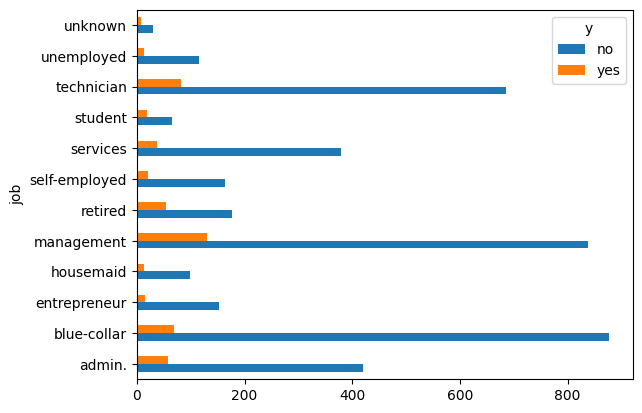

In [23]:
df.groupby('job')['y'].value_counts().unstack().plot.barh()

In [24]:
df.groupby('education')['y'].value_counts().unstack()

y,no,yes
education,,
primary,614,64
secondary,2061,245
tertiary,1157,193
unknown,168,19


<Axes: ylabel='education'>

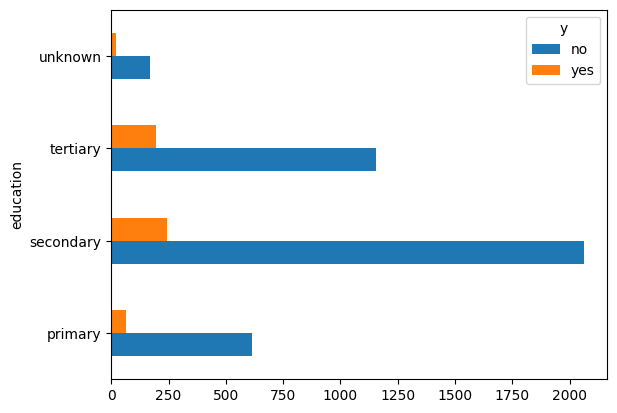

In [25]:
df.groupby('education')['y'].value_counts().unstack().plot.barh()

In [26]:
df.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
y            object
dtype: object

In [27]:
col=[]
q1=[]
q2=[]
q3=[]
upper_fence=[]
lower_fence=[]
iqr=[]
dfq=['age','balance','day','duration','campaign','pdays','previous']
for i,p in enumerate(dfq):
    col.append(p)
    q1.append(df[p].quantile(0.25))
    q3.append(df[p].quantile(0.75))
    q2.append(df[p].median())
    iqr.append(q3[i]-q1[i])
    upper_fence.append(q3[i]+1.5*iqr[i])
    lower_fence.append(q3[i]-1.5*iqr[i])
    
quan={'col':col,'q1':q1,'q2':q2,'q3':q3,'IQR':iqr,'upper_fence':upper_fence,'lower_fence':lower_fence}
quantile=pd.DataFrame(quan)
quantile.columns=['column','Q1','Q2','Q3','iqr','upper fence','lower fence']
quantile


,column,Q1,Q2,Q3,iqr,upper fence,lower fence
0,age,33.0,39.0,49.0,16.0,73.0,25.0
1,balance,69.0,444.0,1480.0,1411.0,3596.5,-636.5
2,day,9.0,16.0,21.0,12.0,39.0,3.0
3,duration,104.0,185.0,329.0,225.0,666.5,-8.5
4,campaign,1.0,2.0,3.0,2.0,6.0,0.0
5,pdays,-1.0,-1.0,-1.0,0.0,-1.0,-1.0
6,previous,0.0,0.0,0.0,0.0,0.0,0.0


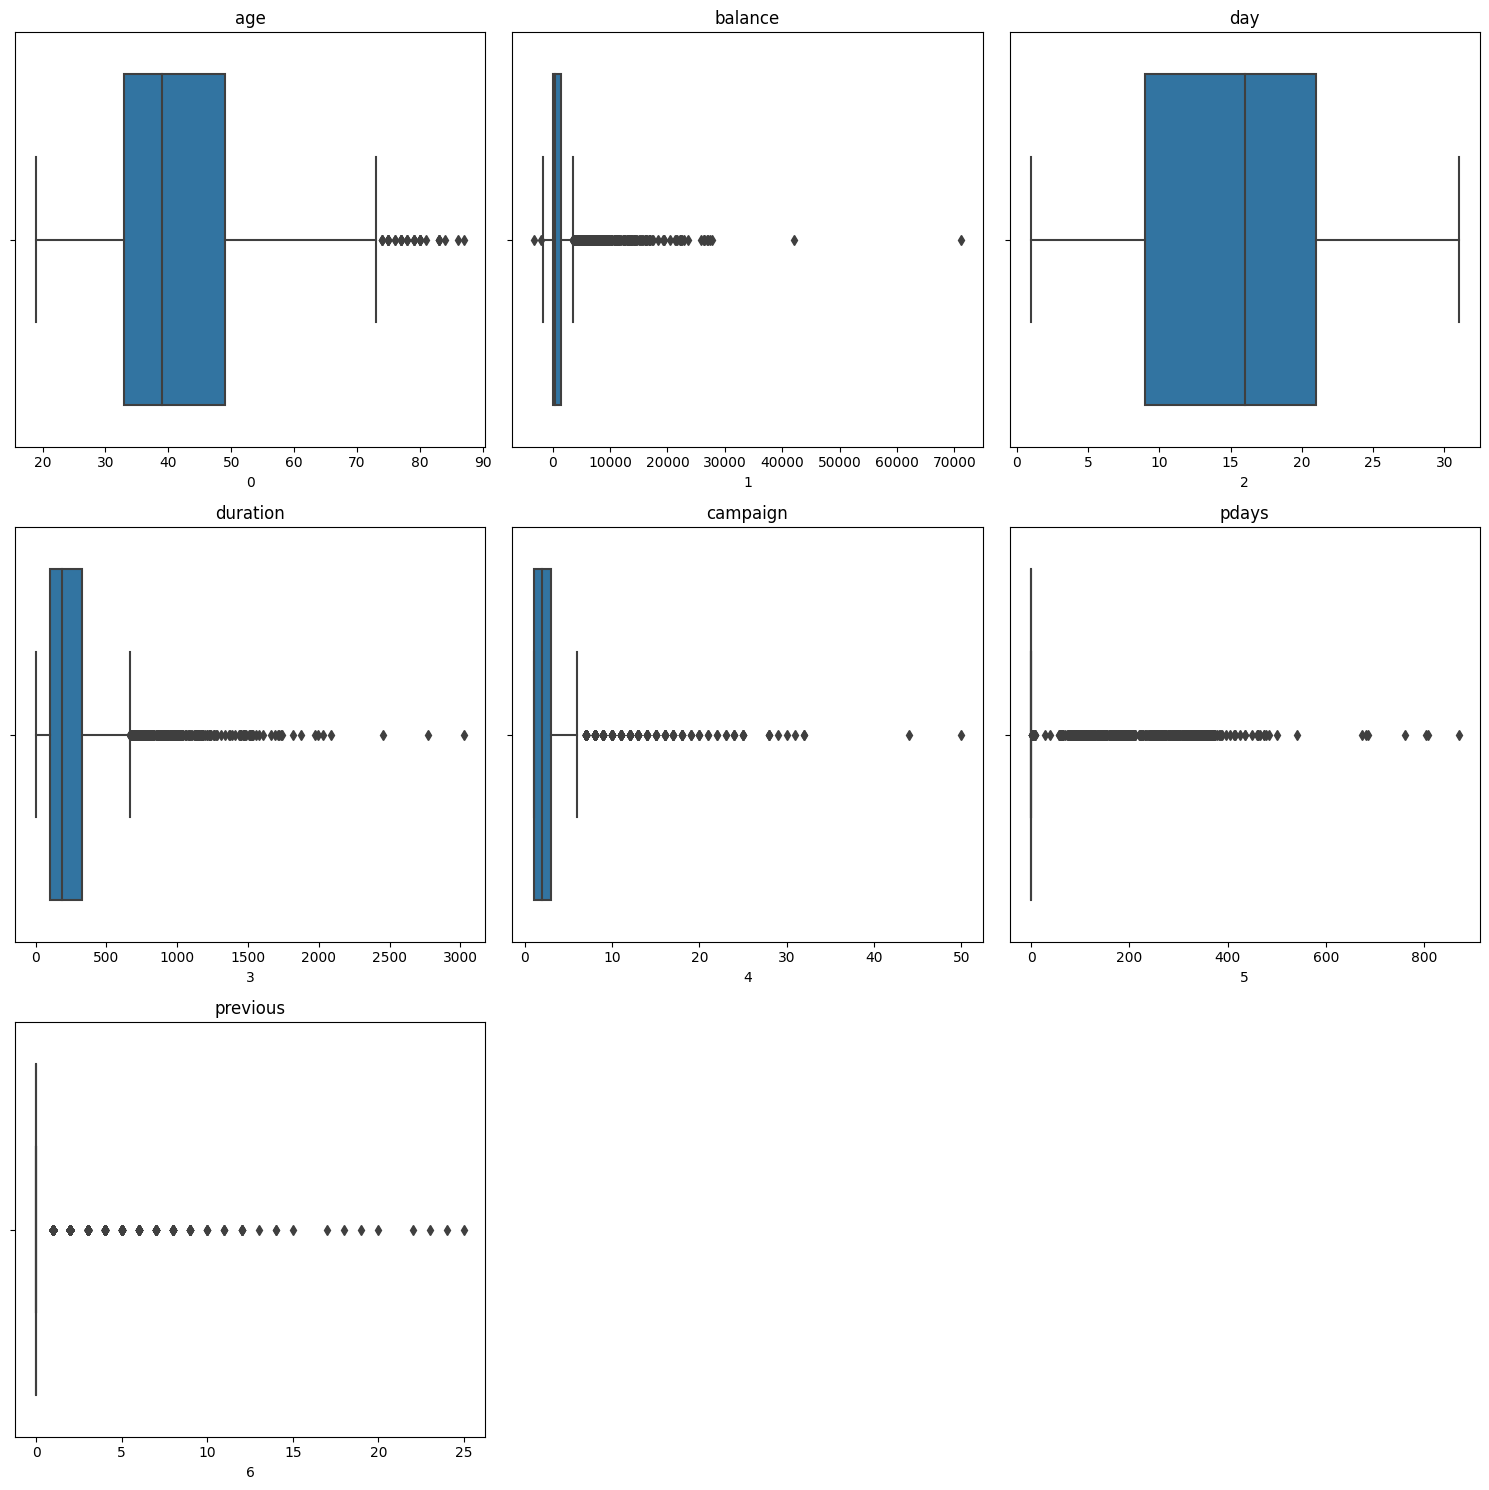

In [28]:
plt.figure(figsize=(15,15))
for i,q in enumerate(dfq):
    plt.subplot(3,3,i+1)
    plt.title(q)
#     sns.boxplot(data=df,x=q)
    sns.boxplot(data=df,x=q)
    plt.xlabel(i)
plt.tight_layout()
plt.show()    
    

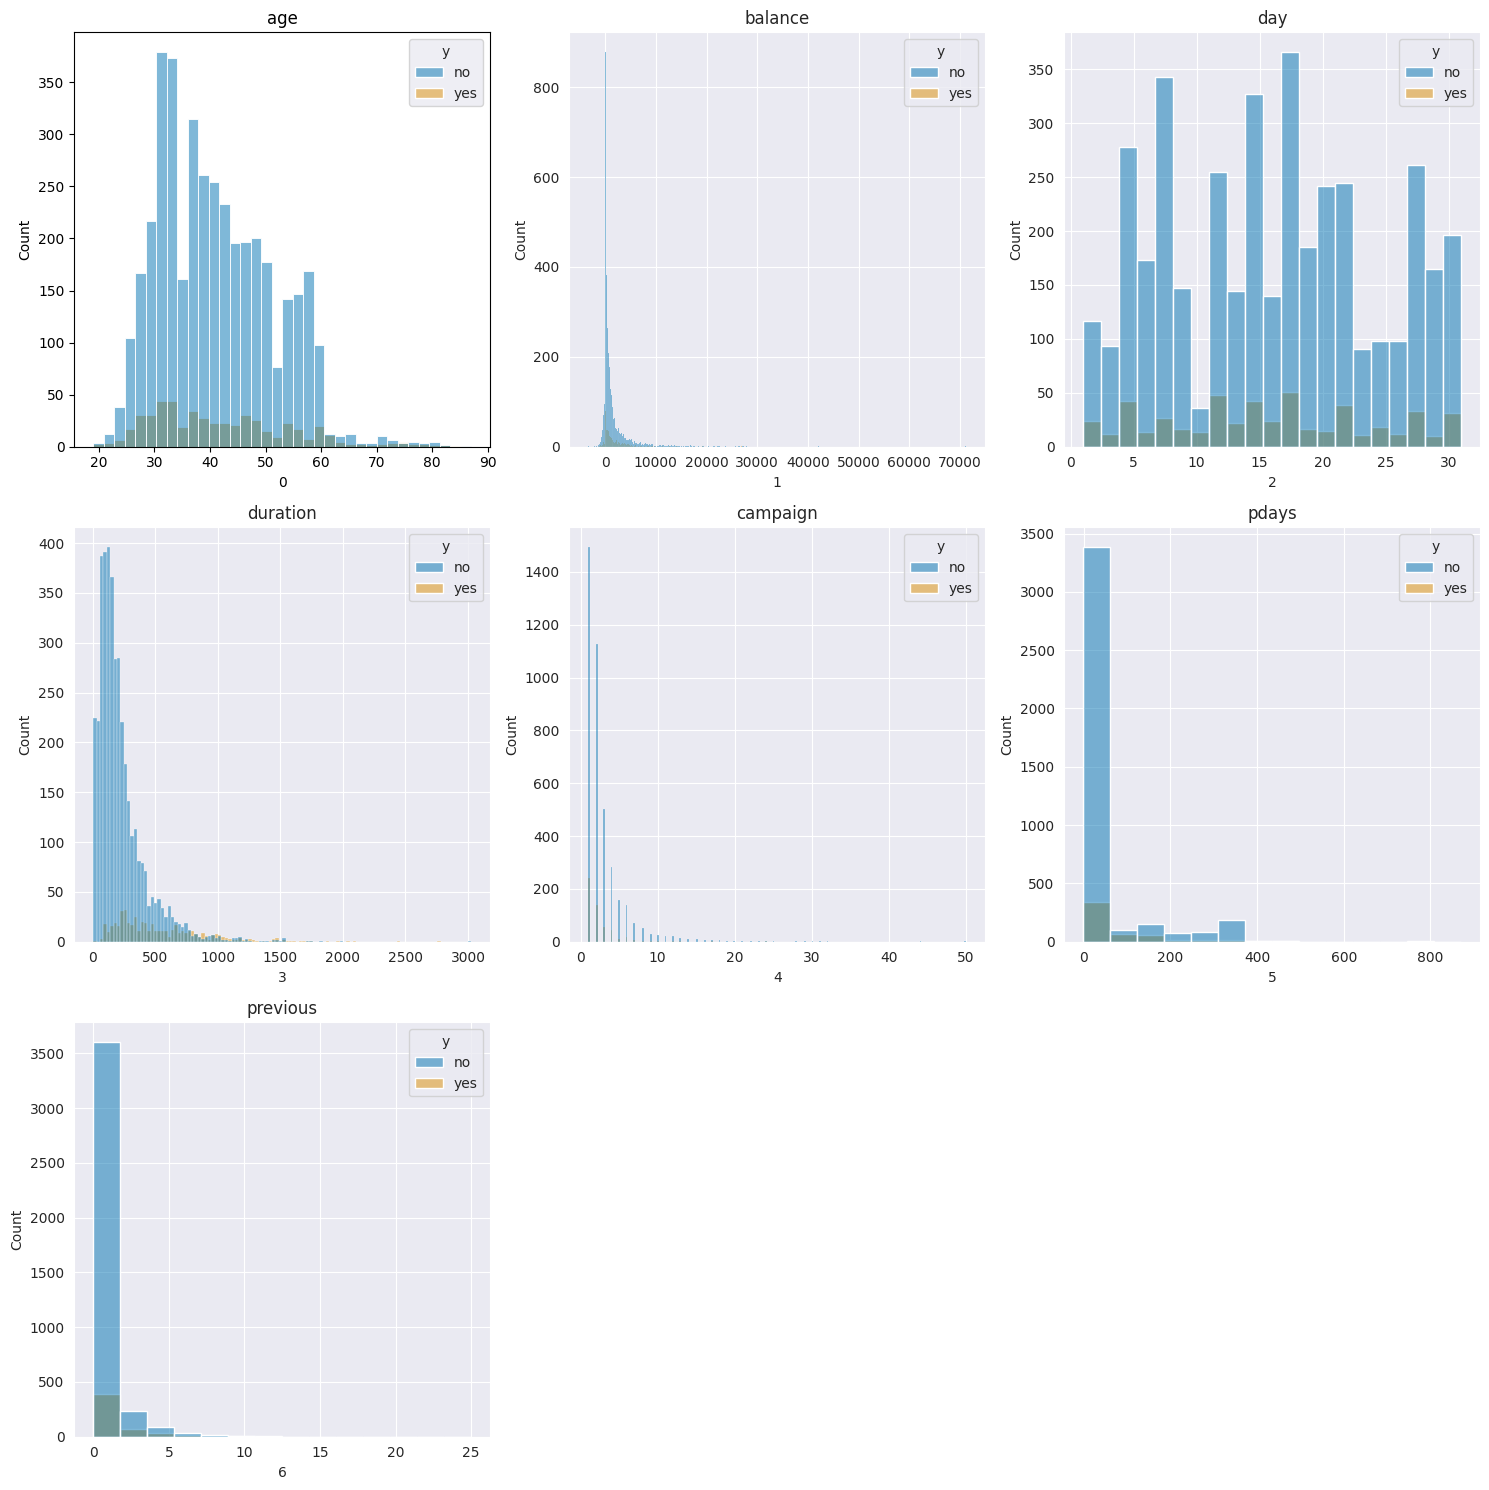

In [29]:
plt.figure(figsize=(15,15))
for i,q in enumerate(dfq):
    plt.subplot(3,3,i+1)
    plt.title(q)
    sns.set_style('darkgrid')
    sns.histplot(data=df,x=q,hue='y',palette='colorblind')
    plt.xlabel(i)
plt.tight_layout()
plt.show() 

In [30]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


<Axes: xlabel='contact'>

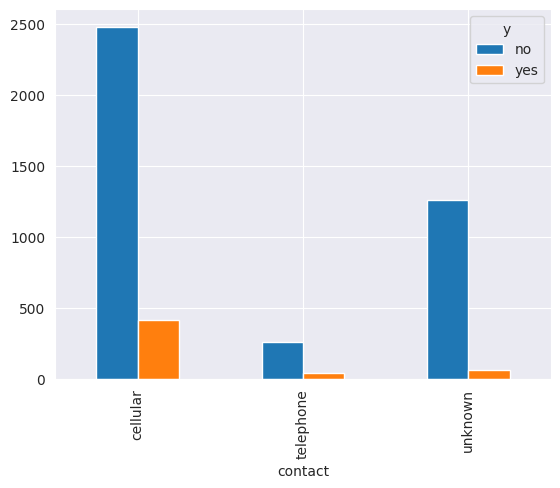

In [31]:
df.groupby('contact')['y'].value_counts().unstack().plot.bar()

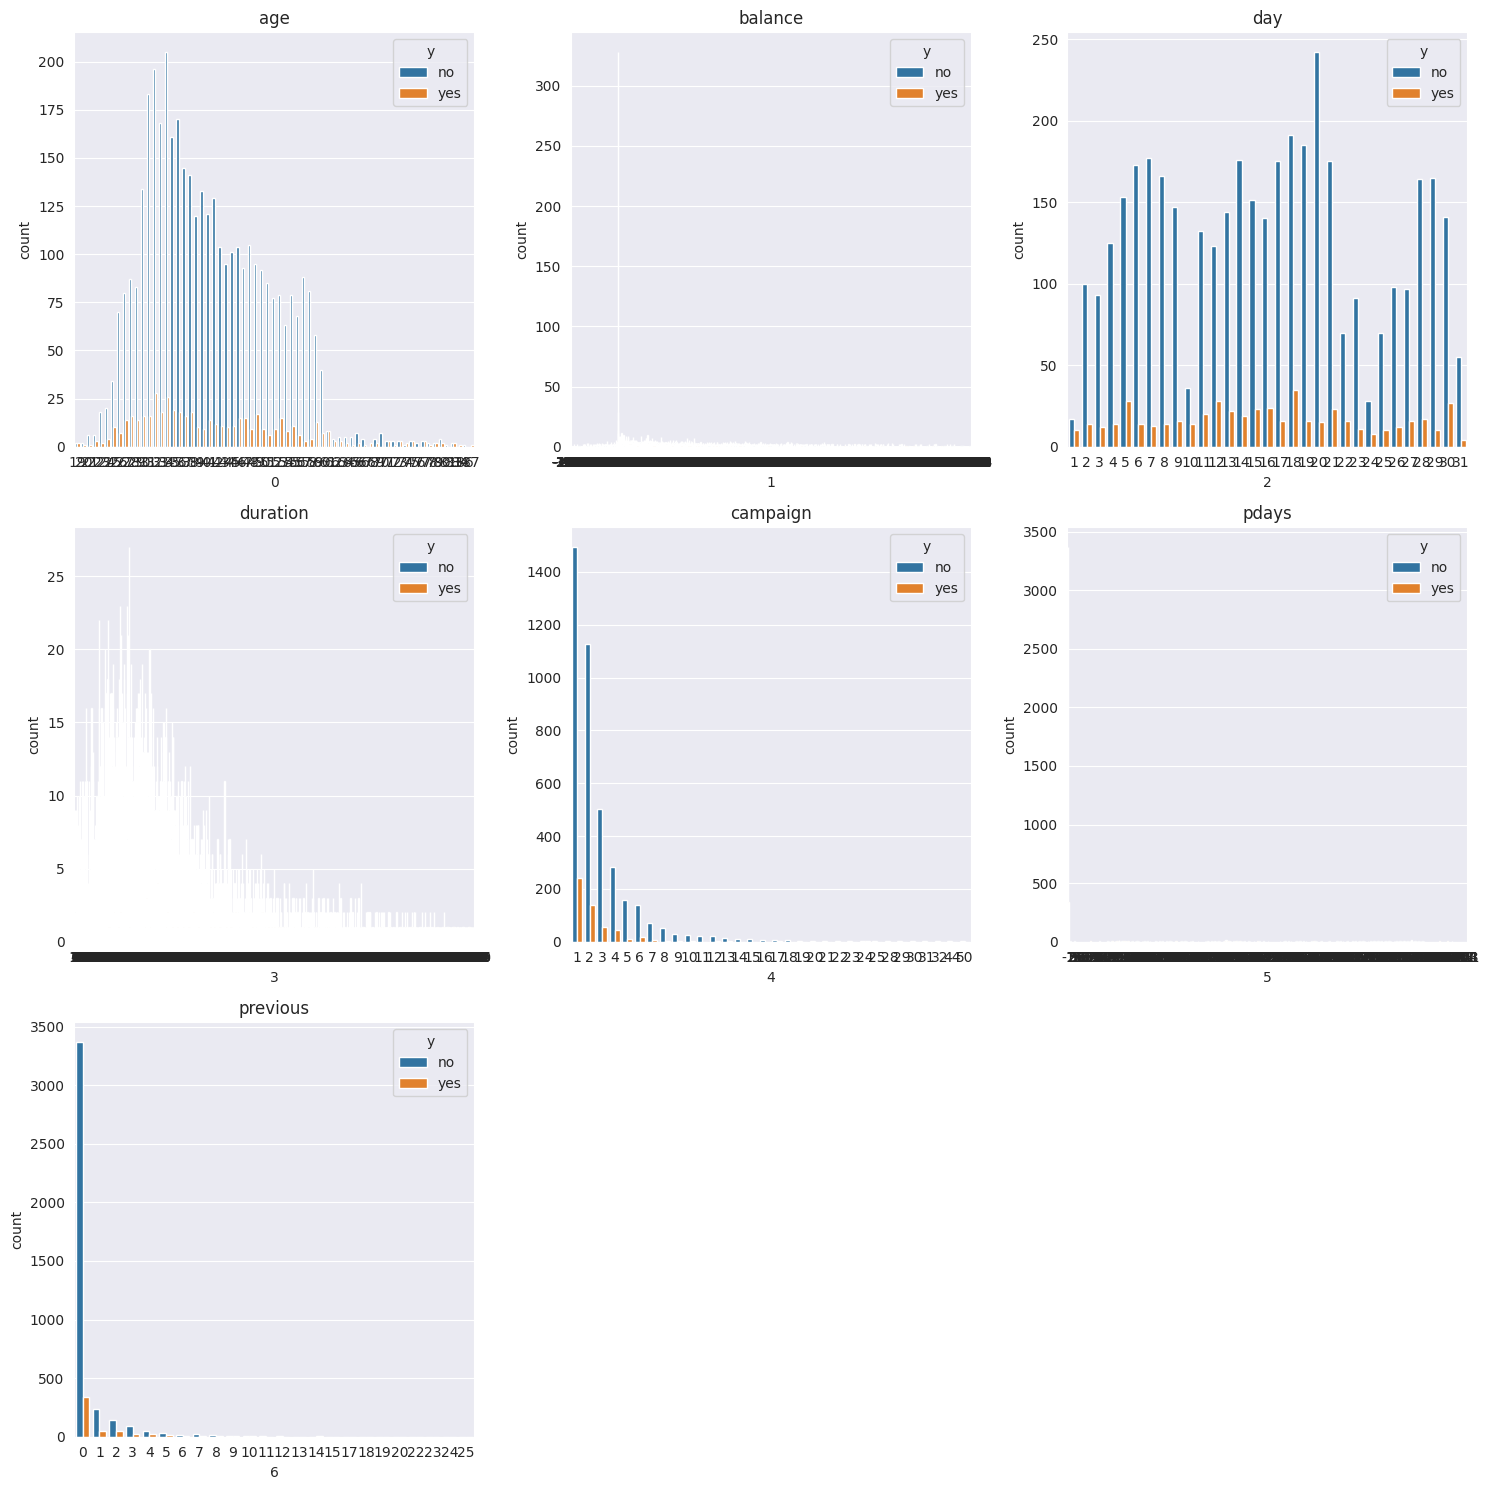

In [32]:
plt.figure(figsize=(15,15))
for i,q in enumerate(dfq):
    plt.subplot(3,3,i+1)
    plt.title(q)
    sns.set_style('darkgrid')
    sns.countplot(data=df,x=q,hue='y')
    plt.xlabel(i)
plt.tight_layout()
plt.show() 

In [33]:
quantile

,column,Q1,Q2,Q3,iqr,upper fence,lower fence
0,age,33.0,39.0,49.0,16.0,73.0,25.0
1,balance,69.0,444.0,1480.0,1411.0,3596.5,-636.5
2,day,9.0,16.0,21.0,12.0,39.0,3.0
3,duration,104.0,185.0,329.0,225.0,666.5,-8.5
4,campaign,1.0,2.0,3.0,2.0,6.0,0.0
5,pdays,-1.0,-1.0,-1.0,0.0,-1.0,-1.0
6,previous,0.0,0.0,0.0,0.0,0.0,0.0


In [34]:
df=df[(df['age']>25) & (df['age']<73)]

In [35]:
df=df[(df['balance']>-365) & (df['balance']<3596.5)]

In [36]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,3759.0,41.040968,9.632078,26.0,33.0,39.0,48.0,72.0
balance,3759.0,689.637670,853.077181,-363.0,62.0,362.0,1012.0,3587.0
day,3759.0,15.779197,8.276436,1.0,8.0,16.0,21.0,31.0
duration,3759.0,263.832668,266.025577,4.0,102.5,183.0,326.0,3025.0
campaign,3759.0,2.793030,3.096075,1.0,1.0,2.0,3.0,50.0
pdays,3759.0,39.849428,101.084835,-1.0,-1.0,-1.0,-1.0,871.0
previous,3759.0,0.521947,1.664834,0.0,0.0,0.0,0.0,25.0


In [37]:
df=df[(df['day']>3) & (df['day']<39)]

In [38]:
df=df[(df['duration']>-8.5) & (df['duration']<666.5)]

In [39]:
quantile

,column,Q1,Q2,Q3,iqr,upper fence,lower fence
0,age,33.0,39.0,49.0,16.0,73.0,25.0
1,balance,69.0,444.0,1480.0,1411.0,3596.5,-636.5
2,day,9.0,16.0,21.0,12.0,39.0,3.0
3,duration,104.0,185.0,329.0,225.0,666.5,-8.5
4,campaign,1.0,2.0,3.0,2.0,6.0,0.0
5,pdays,-1.0,-1.0,-1.0,0.0,-1.0,-1.0
6,previous,0.0,0.0,0.0,0.0,0.0,0.0


In [40]:
df=df[(df['campaign']>0) & (df['campaign']<6)]

In [41]:
df.shape

(2937, 17)

In [42]:
(df['pdays']==-1).sum()

2390

In [43]:
df.shape

(2937, 17)

In [44]:
df.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
y            object
dtype: object

In [45]:
# df['y']=df['y'].astype('int')
# df = df.astype({'y':'int'})
df['y']=df['y'].apply(lambda x:1 if(x=='yes') else 0)

In [46]:
cols=['age','balance','day','duration','campaign','pdays','previous','y']
df[cols].corr()

,age,balance,day,duration,campaign,pdays,previous,y
age,1.000000,0.070632,-0.016666,-0.051404,-0.003923,-0.011352,-0.013466,0.007355
balance,0.070632,1.000000,0.013125,0.030039,-0.022126,0.009797,0.014047,0.089796
day,-0.016666,0.013125,1.000000,-0.028018,0.089275,-0.076225,-0.046214,-0.002624
duration,-0.051404,0.030039,-0.028018,1.000000,-0.040758,0.025584,0.022781,0.259667
campaign,-0.003923,-0.022126,0.089275,-0.040758,1.000000,-0.112118,-0.076689,-0.049042
pdays,-0.011352,0.009797,-0.076225,0.025584,-0.112118,1.000000,0.575899,0.136623
previous,-0.013466,0.014047,-0.046214,0.022781,-0.076689,0.575899,1.000000,0.140423
y,0.007355,0.089796,-0.002624,0.259667,-0.049042,0.136623,0.140423,1.000000


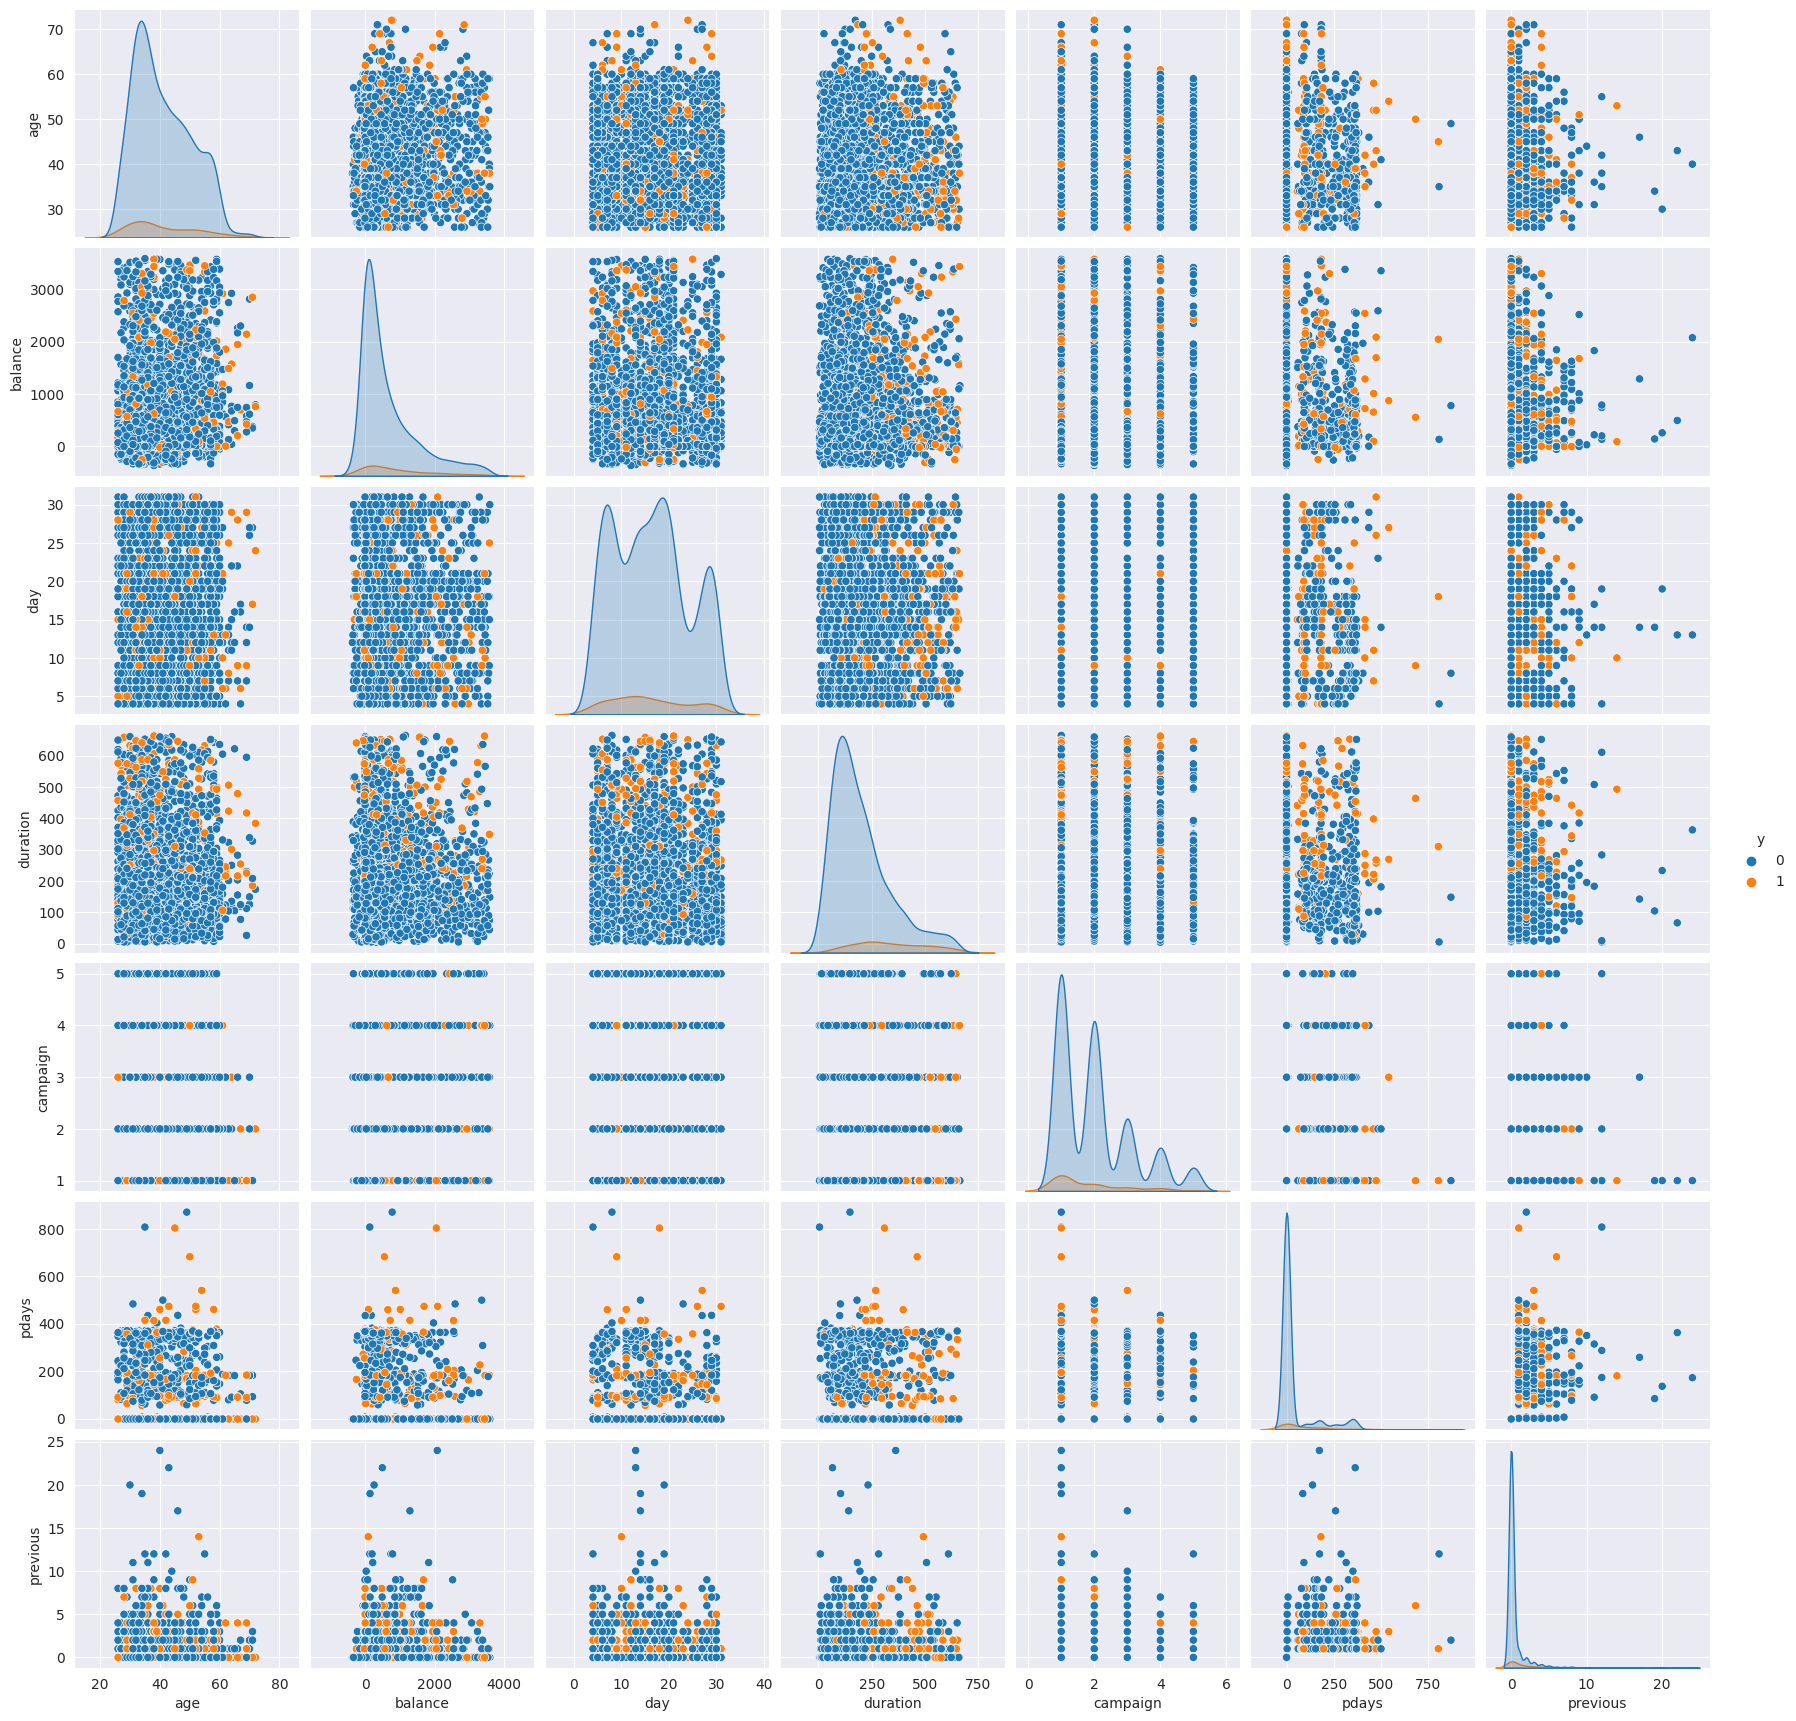

In [47]:
sns.pairplot(df,hue='y')

<Axes: xlabel='count', ylabel='y'>

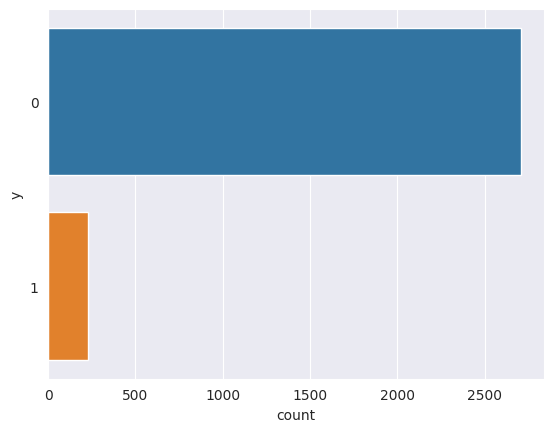

In [48]:
sns.countplot(data=df,y='y')

In [49]:
df.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
y             int64
dtype: object

In [50]:
df1 = pd.get_dummies(df)
df1.head()

,age,balance,day,duration,campaign,pdays,previous,y,job_admin.,job_blue-collar,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,30,1787,19,79,1,-1,0,0,False,False,...,False,False,False,False,True,False,False,False,False,True
2,35,1350,16,185,1,330,1,0,False,False,...,False,False,False,False,False,False,True,False,False,False
4,59,0,5,226,1,-1,0,0,False,True,...,False,False,True,False,False,False,False,False,False,True
5,35,747,23,141,2,176,3,0,False,False,...,False,False,False,False,False,False,True,False,False,False
6,36,307,14,341,1,330,2,0,False,False,...,False,False,True,False,False,False,False,True,False,False


In [51]:
df1.columns

Index(['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous',
       'y', 'job_admin.', 'job_blue-collar', 'job_entrepreneur',
       'job_housemaid', 'job_management', 'job_retired', 'job_self-employed',
       'job_services', 'job_student', 'job_technician', 'job_unemployed',
       'job_unknown', 'marital_divorced', 'marital_married', 'marital_single',
       'education_primary', 'education_secondary', 'education_tertiary',
       'education_unknown', 'default_no', 'default_yes', 'housing_no',
       'housing_yes', 'loan_no', 'loan_yes', 'contact_cellular',
       'contact_telephone', 'contact_unknown', 'month_apr', 'month_aug',
       'month_dec', 'month_feb', 'month_jan', 'month_jul', 'month_jun',
       'month_mar', 'month_may', 'month_nov', 'month_oct', 'month_sep',
       'poutcome_failure', 'poutcome_other', 'poutcome_success',
       'poutcome_unknown'],
      dtype='object')

In [52]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

In [53]:
X=df1.drop('y',axis='columns')
Y=df1['y']
print(Y.value_counts())
Y.value_counts()[1]/Y.value_counts()[0]
print(X.shape)

y
0    2706
1     231
Name: count, dtype: int64
(2937, 51)


In [54]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler()

Xr,Yr = ros.fit_resample(X,Y)
print(Yr.value_counts()[1]/Yr.value_counts()[0])

1.0


In [55]:
Yr.value_counts()
print(Xr.shape)

(5412, 51)


In [56]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(Xr,Yr,random_state=123,stratify=Yr)

In [57]:
ytrain.value_counts()

y
1    2030
0    2029
Name: count, dtype: int64

In [58]:
ytrain.value_counts()[1]/ytrain.value_counts()[0]

1.0004928536224742

In [59]:
xtrain.dtypes

age                    int64
balance                int64
day                    int64
duration               int64
campaign               int64
pdays                  int64
previous               int64
job_admin.              bool
job_blue-collar         bool
job_entrepreneur        bool
job_housemaid           bool
job_management          bool
job_retired             bool
job_self-employed       bool
job_services            bool
job_student             bool
job_technician          bool
job_unemployed          bool
job_unknown             bool
marital_divorced        bool
marital_married         bool
marital_single          bool
education_primary       bool
education_secondary     bool
education_tertiary      bool
education_unknown       bool
default_no              bool
default_yes             bool
housing_no              bool
housing_yes             bool
loan_no                 bool
loan_yes                bool
contact_cellular        bool
contact_telephone       bool
contact_unknow

In [60]:
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression

model1 = LogisticRegression()

model1.fit(xtrain,ytrain)

/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [61]:
ytrainPred = model1.predict(xtrain)
ytestPred = model1.predict(xtest)
print("Training Data Accuracy", (ytrain == ytrainPred).sum()/len(xtrain))
print("Test Data Accuracy", (ytest == ytestPred).sum()/len(xtest))

Training Data Accuracy 0.7957625030795763
Test Data Accuracy 0.7989652623798965


In [62]:
from sklearn.metrics import confusion_matrix
conf_matrix_train = pd.DataFrame(confusion_matrix(ytrain , ytrainPred))
conf_matrix_train

,0,1
0,1595,434
1,395,1635


In [63]:
conf_matrix_test = pd.DataFrame(confusion_matrix(ytest , ytestPred))
conf_matrix_test

,0,1
0,532,145
1,127,549


In [64]:
ypredTrainProb = model1.predict_proba(xtrain)[:,1]
from sklearn.metrics import roc_curve,roc_auc_score

auc = roc_auc_score(ytrain,ypredTrainProb)
print(auc)
fpr,tpr,thresh = roc_curve(ytrain,ypredTrainProb)

0.8648202055418113


In [65]:
g_val = tpr * (1 - fpr)
print(g_val)

[0.         0.0044335  0.00837438 0.00837026 0.01181683 0.01179935
 0.01769903 0.02212379 0.02211286 0.02653543 0.02652232 0.03192502
 0.03190924 0.03632744 0.03630947 0.04072549 0.04070534 0.04413832
 0.05394683 0.05590854 0.06179365 0.06173247 0.06614193 0.06859163
 0.06855764 0.07443401 0.07835159 0.0782739  0.08365523 0.08707971
 0.0909934  0.09085793 0.10844334 0.11430514 0.11625907 0.12114391
 0.1210837  0.12498962 0.12492747 0.12931945 0.12925511 0.13169389
 0.13156278 0.13497367 0.13490642 0.13977669 0.13970701 0.14262771
 0.14255657 0.14742199 0.14712773 0.14955558 0.15489685 0.1548194
 0.15918735 0.16501128 0.16986455 0.16977958 0.17560059 0.17802601
 0.1774023  0.1836863  0.18658661 0.18630547 0.19354532 0.19837188
 0.19807253 0.20867495 0.20856983 0.21627679 0.21616778 0.21905644
 0.21883551 0.22316412 0.22305147 0.22785861 0.23026218 0.23458861
 0.23651147 0.23615312 0.24095298 0.24287292 0.24262723 0.25125823
 0.25413524 0.25400656 0.25879914 0.25853693 0.26188833 0.26715

In [66]:
print(max(g_val) , np.argmax(g_val))

0.63991968671019 292


In [67]:
print(f"Thresh for max tpr & min fpr = {thresh[np.argmax(g_val)]}")

Thresh for max tpr & min fpr = 0.5182538894199238


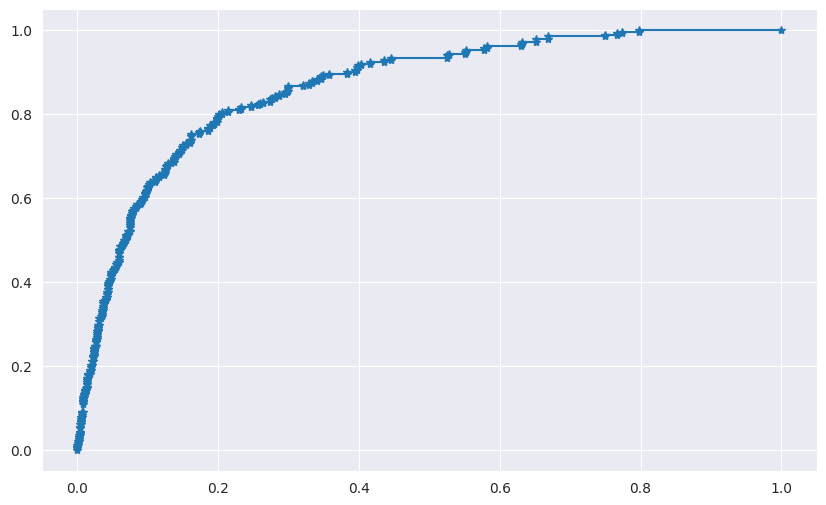

In [68]:
plt.figure(figsize = (10,6))

plt.plot(fpr , tpr , marker = '*')

plt.show()